In [7]:
#!pip install imbleran
!pip install seaborn

In [26]:
import pandas as pd
import numpy as np
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [6]:
df.shape

(100, 21)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.327419,-0.123936,0.377707,-0.650123,0.267562,1.228781,2.208772,-0.185977,0.238732,-2.565438,...,0.644056,0.104375,-1.703024,-0.510083,-0.108812,-0.230132,1.553707,1.497538,-1.476485,0
1,-0.843981,-0.018691,-0.841018,1.374583,0.157199,-0.599719,2.217041,-2.032194,-2.310214,-0.490477,...,1.360939,-1.844740,-0.341096,0.137243,1.704764,0.464255,1.225786,-0.842880,1.303258,0
2,-0.204642,0.472155,-0.140616,-2.902493,-1.513665,1.149545,2.283673,-0.809117,-1.723535,-0.958556,...,-0.279701,-1.431391,0.260146,-0.501306,-2.320545,0.422214,1.386474,-0.073335,0.586859,0
3,0.208274,-0.156982,0.063369,-0.545759,-0.395416,-2.679969,1.507772,0.391485,-0.487337,-0.946147,...,-1.011854,-1.124795,0.347291,-1.078836,0.046923,-0.978324,1.100517,-0.697134,0.339577,0
4,0.785568,0.208472,0.760082,-0.046130,0.310844,-0.403927,1.462897,0.962173,-0.520996,1.647360,...,0.316792,-0.261528,-1.260698,0.822700,0.141031,-0.294805,2.216364,-1.129875,-1.059984,1


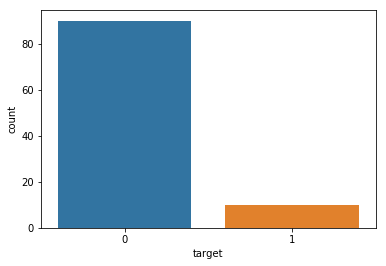

In [9]:
sns.countplot('target',data=df)

In [41]:
df.target.value_counts()

0    90
1    10
Name: target, dtype: int64

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_scaled = pca.fit_transform(X)

In [31]:
X[y==1, 0]

array([-2.54661668, -2.91676826, -0.84399458, -2.81687964, -2.221968  ,
       -2.96805531, -2.59495962, -2.88162303, -3.73525256, -2.85432621])

In [32]:
X[y==1, 1]

array([ 0.07664698, -1.69253484,  1.2748164 , -0.00491207,  0.96074098,
        0.526068  , -0.47428169,  0.47847694, -1.80645336,  1.70804499])

In [33]:
np.unique(y)

array([0, 1])

In [27]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['red', 'blue']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

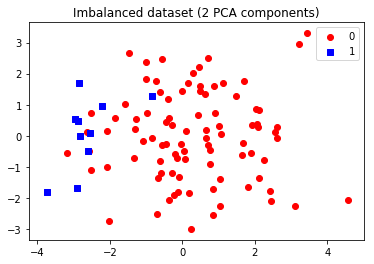

In [28]:
plot_2d_space(X_scaled, y, 'Imbalanced dataset (2 PCA components)')

# SCikit learn library used for upsampling and downsampling

#### Upsampling Minority Class

In [75]:
from sklearn.utils import resample

1    90
0    90
Name: target, dtype: int64

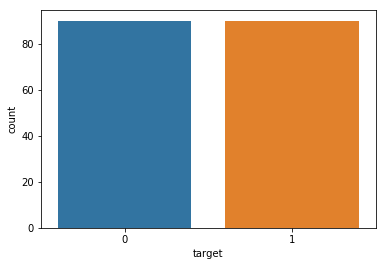

In [76]:
train_majority = df[df.target == 0]
train_minority = df[df.target == 1]
#
train_minority_upsampled = resample(train_minority,replace=True,n_samples=len(train_majority),random_state=1)

#
train_upsampled = pd.concat([train_minority_upsampled,train_majority])

#
sns.countplot('target',data=train_upsampled)
#
train_upsampled.target.value_counts()

#### Under Sampling Majority Class 

1    10
0    10
Name: target, dtype: int64

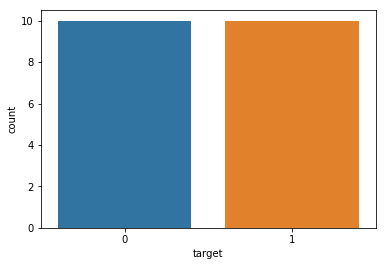

In [77]:
train_majority_downsampled = resample(train_majority,replace=False,n_samples=len(train_minority),random_state=1)
#
train_downsampled = pd.concat([train_majority_downsampled,train_minority])
#
sns.countplot('target',data=train_downsampled)
#
train_downsampled.target.value_counts()

# Random under-sampling and over-sampling with imbalanced-learn

#### * Random Under Sampling with RANDOMUNDERSAMPLER

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
print('Removed Indices : ',id_rus)

Removed Indices :  [95 63 78  0 45 42 41 17 39 19  4  8  9 14 16 40 67 70 71 74]


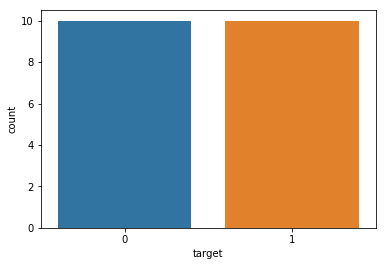

In [38]:
df_rus = pd.DataFrame(X_rus)
df_rus['target'] = y_rus

sns.countplot('target',data=df_rus)

In [40]:
df_rus.target.value_counts()

1    10
0    10
Name: target, dtype: int64

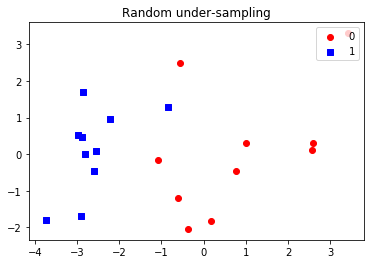

In [42]:
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#### * Random Under Sampling with RANDOMUNDERSAMPLER

In [51]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros,y_ros = ros.fit_sample(X,y)
print(X_ros.shape[0] - X.shape[0],'new random picked points')

80 new random picked points


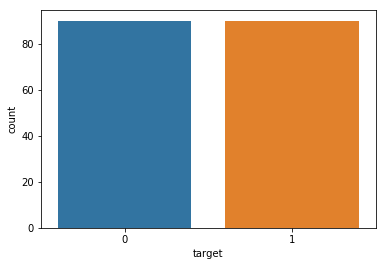

In [52]:
df_ros = pd.DataFrame(X_ros)
df_ros['target'] = y_ros

sns.countplot('target',data=df_ros)

In [53]:
df_ros.target.value_counts()

1    90
0    90
Name: target, dtype: int64

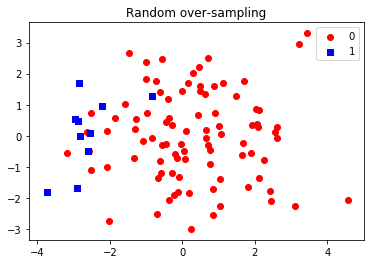

In [54]:
plot_2d_space(X_ros, y_ros, 'Random over-sampling')

# Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm,y_sm = smote.fit_sample(X,y)
    

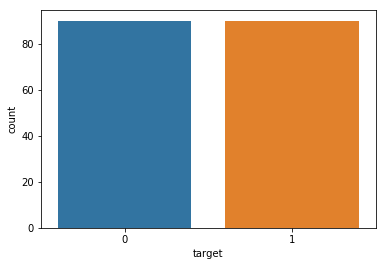

In [48]:
df_smote = pd.DataFrame(X_sm)
df_smote['target'] = y_sm

sns.countplot('target',data=df_smote)

In [49]:
df_smote.target.value_counts()

1    90
0    90
Name: target, dtype: int64

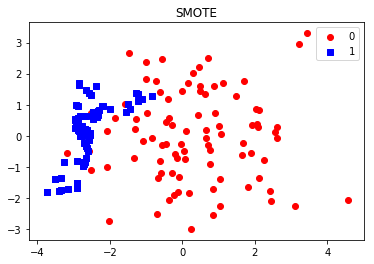

In [50]:
plot_2d_space(X_sm, y_sm, 'SMOTE')

# Under-sampling: Tomek links
    
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [63]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

Removed indexes: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


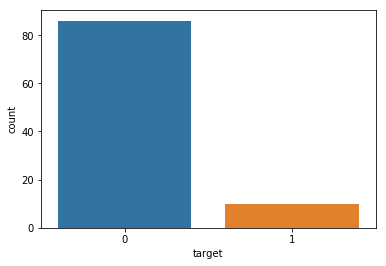

In [64]:
df_tomek = pd.DataFrame(X_tl)
df_tomek['target'] = y_tl
sns.countplot('target',data=df_tomek)

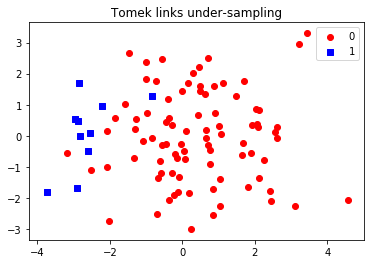

In [58]:
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

# Under-sampling: Cluster Centroids
This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1) .

In [61]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)


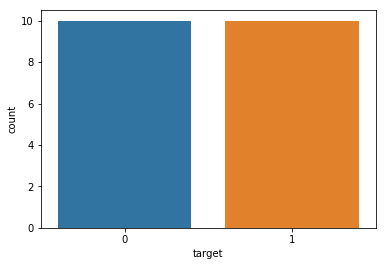

In [62]:
df_cc= pd.DataFrame(X_cc)
df_cc['target'] = y_cc
sns.countplot('target',data=df_cc)

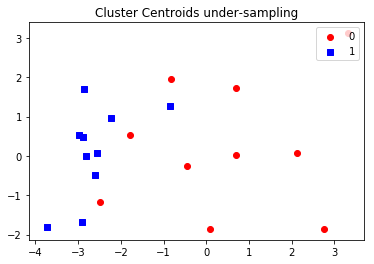

In [65]:
plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

# Over-sampling followed by under-sampling
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [66]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

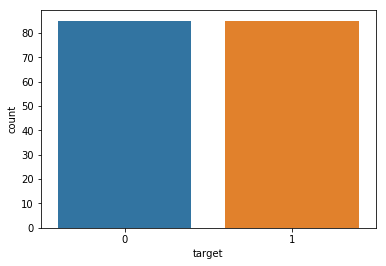

In [67]:
df_smt= pd.DataFrame(X_smt)
df_smt['target'] = y_smt
sns.countplot('target',data=df_smt)

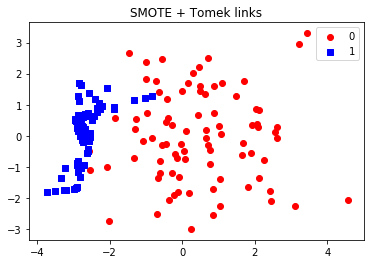

In [68]:
plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')